<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1 (2022)</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **TBA**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems


## Submission

You need to submit the following items:
- The notebook `Assignment_1_2022_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. You will also need to add your details below. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`. Remember to document your code using comments and doc strings as appropriate.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.
* Comment your code.
* Before submitting, restart the kernel in Jupyter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

Credit: This assignment is based on previous work by Alex Niven in COMP2420/6420.  We thank Alex for allowing us to use his work and build on it.

### Enter your Student ID below:

******
## Context
You have been hired as a data scientist on a cybersecurity consulting team.  Your team has been tasked with advising government on the risk and impact of recent cybersecurity threats. 

### What is cybersecurity and why do we care?

“Cybersecurity is the practice of protecting critical systems and sensitive information from digital attacks” (IBM,2022).  Attackers normally target vulnerabilities in software and hardware systems in order to either bring down a system or steal sensitive or personal information.  Common cyber threats include malware, phishing, ransomware and distributed denial of service (DDoS).  You can read more about cyber threats on [the Australian Cyber Security Centre web page](https://www.cyber.gov.au/acsc/individuals-and-families/threats).  

Cyber-attacks can have significant negative impact to individuals, businesses and society at large.  They can lead to loss of privacy and money, cause disruption in key services and even cause death (some examples are given in [this article on impact of cyber-attacks here](https://www.securitymagazine.com/articles/96337-the-real-world-impacts-of-cyberattacks)).  Moreover, dealing with cyber-attacks is expensive.  IBM reports that the cost of a data breach in 2020 was USD $3.85 million globally (IBM, 2022).  


### How could you start your underlying investigation?

As a data scientist, you need to understand what problem you are trying to solve first.  In this particular case, you are trying to assess the risk and impact of recent cybersecurity threats.  In order to do so, you need to know what are those threats and have a method to carry out this assessment.  Where can you find this information?  There are various sources you could draw from.  To get started, your team has identified a few relevant systems for your investigation as described next.

#### The Common Vulnerability and Exposures (CVE) system
The CVE system is like a database that holds a number of the publicly known vulnerabilities that exist for software. It is the de-facto identifying system for publicly exposed vulnerabilities in systems, used by big tech companies such as  Apple, Microsoft, Google, Red Hat, etc. The CVE is a schema that allows the consistent storing of information regarding vulnerabilities.  More reading on the CVE is [here](https://www.cve.org/)

The CVE system was developed by [The MITRE Corporation](https://www.mitre.org/) almost 20 years ago, and is now the de-facto system for providing identifiers for vulnerabilities in various systems. 

CVE defines a vulnerability as, _"A weakness in the computational logic (e.g., code) found in software and hardware components that, when exploited, results in a negative impact to confidentiality, integrity, or availability"._ A CVE can affect multiple products and multiple software versions of a product.

However, the CVE system alone is incomplete, and extended by organisations such as the **National Vulnerability Database (NVD)**.

#### The Common Weakness Enumeration (CWE) system
There is another related system to CVE called the [Common Weakness Enumeration (CWE)](https://cwe.mitre.org), also developed by MITRE. CWE categorises types of software vulnerabilities whereas CVE is just a list of currently known vulnerabilities regarding specific systems and products (Camacho, 2021) .  Each CWE identifier is related to a specific type of weakness which will have its own unique characteristics, rather than specific instances of vulnerabilities within products or systems. 
The CWE's are broadly viewed in three categories:
- [by Software Development](https://cwe.mitre.org/data/definitions/699.html)
- [by Hardware Design](https://cwe.mitre.org/data/definitions/1194.html)
- [by Research Concepts](https://cwe.mitre.org/data/definitions/1000.html)

#### The Common Vulnerability Scoring System (CVSS)
CVSS is the de-facto scoring system for determining the impacts of vulnerabilities in the CVE system.  It is developed and maintained by the [National Vulnerability Database (NVD)](https://nvd.nist.gov).  All vulnerabilities in the NVD have been assigned a CVE identifier. Developed by the Forum of Incident Response and Security Teams (FIRST), the CVSS system is now in its 3<sup>rd</sup> major iteration (version 3).

### The Assignment Dataset: based on the Common Vulnerability Scoring System (CVSS) data
The assignment dataset is derived from a subset of the Common Vulnerability Scoring System (CVSS) data for the year 2020 available from the [National Vulnerability Database (NVD)](https://nvd.nist.gov). 

Note that while over 1000 CWE identifiers exist, only a small subset will be present within our dataset. This is due to the NVD using their own subset of them, which can be found on the [NVD website](https://nvd.nist.gov/vuln/categories).

We have further filtered the 2020 CVSS dataset by retaining only the records that relate to the Software Development viewpoint. In our dataset, each unique CVE is mapped to one or more CWE's and is given a vulnerability score that is assigned by the CVSS scoring system. 



### What should I do next? 
Good question! Now that you have some background, you can work with the given CVE-based dataset as a starting point to explore a number of questions to help in your investigation.  You can draw on your python, data analysis and basic machine learning skills to work towards the goal that your team has been tasked with.


*****

References

IBM. 2022. What is Cybersecurity? | IBM. [online] Available at: [https://www.ibm.com/au-en/topics/cybersecurity](https://www.ibm.com/au-en/topics/cybersecurity). (Accessed 3 March 2022).

Camacho, R. 2021.  All about CWE: Common Weakness Enumeration. Parasoft. [https://www.parasoft.com/blog/what-is-cwe/#:~:text=In%20short%3A%20the%20difference%20between,regarding%20specific%20systems%20and%20products.](https://www.parasoft.com/blog/what-is-cwe/#:~:text=In%20short%3A%20the%20difference%20between,regarding%20specific%20systems%20and%20products.)

**********
## Data Description
We have a sizable dataset to give you (in the form of 2 files), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line. 

The below tables provide an outline of the data, broken down into the columns of the dataset features. 

###  The CVSS data table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| assigner       | The entity who assigned the CVE |
| description     | A description of the vulnerability |
| cwe_ids         | The CWE identifiers of the vulnerability. Note that there can be multiple cwe_id's attached to one cve_id |
| refs            | url links to the initial postings of the vulnerability |
| ref_names       | other information which provide more reference about the CVE |
| ref_sources     | other information which provide more reference about the CVE |
| ref_tags        | other information which provide more reference about the CVE |
| v3_attackVector | CVSSv3 field, identifier for how the vulnerability would be used in an attack |
| v3_attackComplexity | CVSSv3 field, identifier for the difficulty of performing an attack using the vulnerability |
| v3_privilegesRequired | CVSSv3 field, an identifier for the privileges required in the system to use the vulnerability successfully |
| v3_userInteraction | CVSSv3 field, an identifier for whether a user needs to actively interact for the vulnerability to be exploited or not |
| v3_scope | CVSSv3 field, an identifier for whether the scope of an item changes when using the vulnerability. e.g: whether a regular user becomes a superuser. |
| v3_confidentialityImpact | CVSSv3 field, identifier for the impact upon the confidentiality of information in the product/service after using the vulnerability |
| v3_integrityImpact | CVSSv3 field, identifier for the impact upon the integrity of information in the product/service after using the vulnerability |
| v3_availabilityImpact | CVSSv3, field, identifier for the impact upon the availability of information in the product/service after using the vulnerability |
| v3_exploitabilityScore | The Exploitability Score is a sub score of the CVSS Base Score |
| v3_impactScore | The Impact Score is a sub score of the CVSS Base Score |
| v3_baseScore | The CVSS score (out of 10) given to the vulnerability based on CVSS v3.1 |
| v3_baseSeverity | A textual representation of the numeric Base Score|

We only use the Base Metrics out of the [CVSS Metrics](https://www.first.org/cvss/v3-1/media/MetricGroups.svg). While there are additional metrics that can be applied, most are variants. Therefore, we will use the base metrics. The column names starting with 'v3_' are CVSS v3.1 metrics. Refer to the specification document  [CVSSv3.1 Guide](https://www.first.org/cvss/v3.1/specification-document) for more information on the metrics. 

**Note:** While this dataset has 20 columns, the data in the last four columns have been purposely omitted (see Question 2 of the Assignment).

###  The CVE to Configurations mapping table
| Column Name    | Description    |
| :------------- | :------------- |
| cve_id         | The CVE identifier for the vulnerability |
| vendor         | The name of the vendor who produces the product |
| product_name   | The name of the affected product       |
| version        | List of the affected product versions |

Recall that a CVE can affect multiple products and multiple software versions of a product.

*******************
## Package Imports

In [1]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that justification as to WHY you are using them MUST be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
# 
import math as math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate

****
## Q1: Loading and Processing the Data
Your first step in any data analysis and visualisation task is to load the data and make it usable. Note that the data consists of various types (Categorical, Numerical, Text, etc.). Also the dataset may not be perfect; it may contain missing data or invalid values at some places. It would be wise to perform some pre-processing to make the data easier to work with. 

#### (Q1.a) You need to load the following two files available in the './data' folder into a suitable data structure:
- cvss_dataset.csv
- cve_configurations_mapping.csv

Please write out the code you would use to load those files and the code you would use to perform some pre-processing. (2 marks)

#### (Q1.b)You also need to briefly outline your steps and justify your decisions. 
This is an open-ended question, and marks will be awarded for logical processing of data. (3 marks)

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns.
* It may be worth recoding the CVSS data to the numerical values required for Q2.
* You are welcome to drop unwanted columns (but don't remove or impute values for the last four columns as you will be asked to recreate these columns in Q2)
* If you wish, you may combine the data available in both files.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [3]:
# YOUR CODE HERE (Q1.a)
dataset = pd.read_csv("data/cvss_dataset.csv")
configurations = pd.read_csv("data/cve_configurations_mapping.csv")

dataset = dataset.drop(['assigner','description','refs','ref_names','ref_sources','ref_tags'],axis=1)

# Attack Vector to score
AttackVector = {"NETWORK": 0.85, "ADJACENT_NETWORK": 0.62, "LOCAL": 0.55, "PHYSICAL": 0.2}
dataset["attackVector_score"] = dataset["v3_attackVector"].map(AttackVector)

# Attack Complexity to score
AttackComplexity = {"LOW": 0.77, "HIGH": 0.44}
dataset["attackComplexity_score"] = dataset["v3_attackComplexity"].map(AttackComplexity)

# Privileges Required to score
dataset.loc[(dataset.v3_privilegesRequired == "NONE"), "privilegesRequired_score"] = 0.85
dataset.loc[(dataset.v3_scope == "UNCHANGED") & (dataset.v3_privilegesRequired == "LOW"), "privilegesRequired_score"] = 0.62
dataset.loc[(dataset.v3_scope == "CHANGED") & (dataset.v3_privilegesRequired == "LOW"), "privilegesRequired_score"] = 0.68
dataset.loc[(dataset.v3_scope == "UNCHANGED") & (dataset.v3_privilegesRequired == "HIGH"), "privilegesRequired_score"] = 0.27
dataset.loc[(dataset.v3_scope == "CHANGED") & (dataset.v3_privilegesRequired == "HIGH"), "privilegesRequired_score"] = 0.5

# User Interaction to score
UserInteraction = {"NONE": 0.85, "REQUIRED": 0.62}
dataset["userInteraction_score"] = dataset["v3_userInteraction"].map(UserInteraction)

# Because Confidentality, Integrity, and Availability's score are same. i.e. High : 0.56, Low : 0.22 and None : 0, 
# therefore, I will match them with a same map
Match = {"HIGH": 0.56, "LOW": 0.22, "NONE": 0}
dataset["confidentialityImpact_score"] = dataset["v3_confidentialityImpact"].map(Match)
dataset["integrityImpact_score"] = dataset["v3_integrityImpact"].map(Match)
dataset["availabilityImpact_score"] = dataset["v3_availabilityImpact"].map(Match)

# merge two dataframe
df = pd.merge(dataset, configurations, on = 'cve_id')

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Q2: Recreating Missing Data
While the dataset that has been provided is thorough, you may have already noticed that the last four columns (i.e. 'v3_exploitabilityScore', 'v3_impactScore', 'v3_baseScore', 'v3_baseSeverity) are empty. These are related to the CVSSv3.1 base score and are well documented in the specification documents  [CVSSv3.1 Guide](https://www.first.org/cvss/v3.1/specification-document) and [CVSS calculator](https://www.first.org/cvss/calculator/3.1).

Your task is as follows:

#### (Q2.a) Implement a **CVSSv3.1** Base Score calculator and recalculate values for the last four columns for each applicable entry in the dataset. (5 marks) 

#### (Q2.b) Explain how you performed the calculations. Provide the [Equations](https://www.first.org/cvss/v3-1/media/EquationsDiagram.svg) that you used. (5 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional Questions for COMP6420 students: [worth extra 5 marks]** 

#### (Q2.c) Please explain how would you validate that your calculations are correct? (3 marks)

#### (Q2.d) Provide some evidence that you have validated your calculations. (2 marks)

In [4]:
# YOUR CODE HERE
def round_number(value):
    """
    Because the np.round doesn't give us correct result, so I write my own round up function
    Parameters: input a number
    Return: a two digit floating rounded number
    """
    value = value * 10
    value = math.ceil(value)
    value = value / 10
    return value

In [5]:
# Calculate the ISS to helping calculate
# ISS = 1 - [(1 - Confidentiality) * (1 - Integrity) * (1 - Availability)]
dataset["ISS"] = 1 - ((1 - dataset['confidentialityImpact_score']) * 
                      (1 - dataset['integrityImpact_score']) * 
                      (1 - dataset['availabilityImpact_score']))

# Calculate Exploitability
# Exploitability = 8.22 * AttackVector * AttackComplexity * PrivilegesRequired * UserInteraction
dataset.loc[:,'v3_exploitabilityScore'] = 8.22 * dataset["attackVector_score"] * dataset["attackComplexity_score"] * dataset["privilegesRequired_score"] * dataset["userInteraction_score"]

# Calculate Impact
# Impact = 6.42 * ISS
dataset.loc[(dataset.v3_scope == "UNCHANGED"),'v3_impactScore'] = 6.42 * dataset["ISS"]
# Impact = 7.52 * (ISS - 0.029) - 3.25 * (ISS - 0.02) ** 15
dataset.loc[(dataset.v3_scope == "CHANGED"), 'v3_impactScore'] = 7.52 * (dataset["ISS"] - 0.029) - 3.25 * ((dataset["ISS"] - 0.02) ** 15)

# Calculate BaseScore
BaseScore = []
for num in np.arange(len(dataset)):
    if dataset.iloc[num,11] <= 0:
        BaseScore.append(0)
    # UNCHANGED: BaseScore = Roundup(Minimum[(Impact + Exploitability), 10])
    elif dataset.iloc[num,6] == "UNCHANGED":
        BaseScore.append(round_number(np.minimum((dataset.iloc[num,11] + dataset.iloc[num,10]), 10)))
    # CHANGED: BaseScore = Roundup(Minimum[1.08 * (Impact + Exploitability), 10])
    else:
        BaseScore.append(round_number(np.minimum(1.08 * (dataset.iloc[num,11] + dataset.iloc[num,10]), 10)))
# append data
dataset['v3_baseScore'] = BaseScore

# Show BaseSeverity
dataset.loc[(dataset.v3_baseScore == 0.0), 'v3_baseSeverity'] = "NONE"
dataset.loc[((dataset.v3_baseScore <= 3.9) & (dataset.v3_baseScore >= 0.1)), 'v3_baseSeverity'] = "LOW"
dataset.loc[((dataset.v3_baseScore <= 6.9) & (dataset.v3_baseScore >= 4.0)), 'v3_baseSeverity'] = "MEDIUM"
dataset.loc[((dataset.v3_baseScore <= 8.9) & (dataset.v3_baseScore >= 7.0)), 'v3_baseSeverity'] = "HIGH"
dataset.loc[((dataset.v3_baseScore <= 10.0) & (dataset.v3_baseScore >= 9.0)), 'v3_baseSeverity'] = "CRITICAL"

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

In [6]:
# merge two dataframe to df
df = pd.merge(dataset, configurations, on = 'cve_id')
df.head()

,cve_id,cwe_ids,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,...,attackComplexity_score,privilegesRequired_score,userInteraction_score,confidentialityImpact_score,integrityImpact_score,availabilityImpact_score,ISS,vendor,product_name,version
0,CVE-2020-0002,"CWE-787,CWE-416",NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,...,0.77,0.85,0.62,0.56,0.56,0.56,0.914816,google,android,"8.0,8.1,9.0,10.0"
1,CVE-2020-0003,CWE-367,LOCAL,HIGH,LOW,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,...,0.44,0.62,0.62,0.56,0.56,0.56,0.914816,google,android,8.0
2,CVE-2020-0005,CWE-787,LOCAL,LOW,HIGH,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,0.77,0.27,0.85,0.56,0.56,0.56,0.914816,google,android,"8.0,8.1,9.0,10.0"
3,CVE-2020-0006,CWE-908,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,NONE,...,0.77,0.85,0.62,0.56,0.00,0.00,0.560000,google,android,"8.0,8.1,9.0,10.0"
4,CVE-2020-0007,CWE-908,LOCAL,LOW,LOW,NONE,UNCHANGED,HIGH,NONE,NONE,...,0.77,0.62,0.85,0.56,0.00,0.00,0.560000,google,android,"8.0,8.1,9.0,10.0"


******
## Q3: Data Exploration
In this question you are asked to explore the given data and present information in a suitable manner. You are required to present the information both visually (using plots) and using descriptive statistics. 

#### (Q3.a)
There is an unverified claim made that most of the CVEs reported in 2020 were of MEDIUM Severity.  How would you check that claim and present the conclusion? Please explain your approach and implement it in code.
<span style= 'float: right;'><b>[5 marks]</b></span>

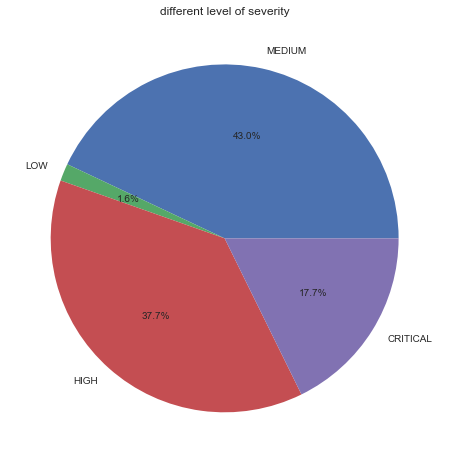

In [7]:
# YOUR CODE HERE
# draw canvas
fig = plt.figure(figsize=(12,8))
ax = ax = plt.axes()

# find the number of rows when base severity is medium
med_len = len(dataset.loc[dataset.v3_baseSeverity == 'MEDIUM',:])
# find the number of rows when base severity is low
low_len = len(dataset.loc[dataset.v3_baseSeverity == 'LOW',:])
# find the number of rows when base severity is high
high_len = len(dataset.loc[dataset.v3_baseSeverity == 'HIGH',:])
# find the number of rows when base severity is critical
crit_len = len(dataset.loc[dataset.v3_baseSeverity == 'CRITICAL',:])
# draw the pie chart
labels = ["MEDIUM", "LOW", "HIGH", "CRITICAL"]
data = np.array([med_len, low_len, high_len, crit_len])
plt.pie(data, labels = labels, autopct='%.1f%%')
ax.set_title("different level of severity")
plt.show()

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

#### (Q3.b)
What are the top 5 CWEs that are mentioned in the data? Why did you present this information in the way you chose?
<span style= 'float: right;'><b>[5 marks]</b></span>

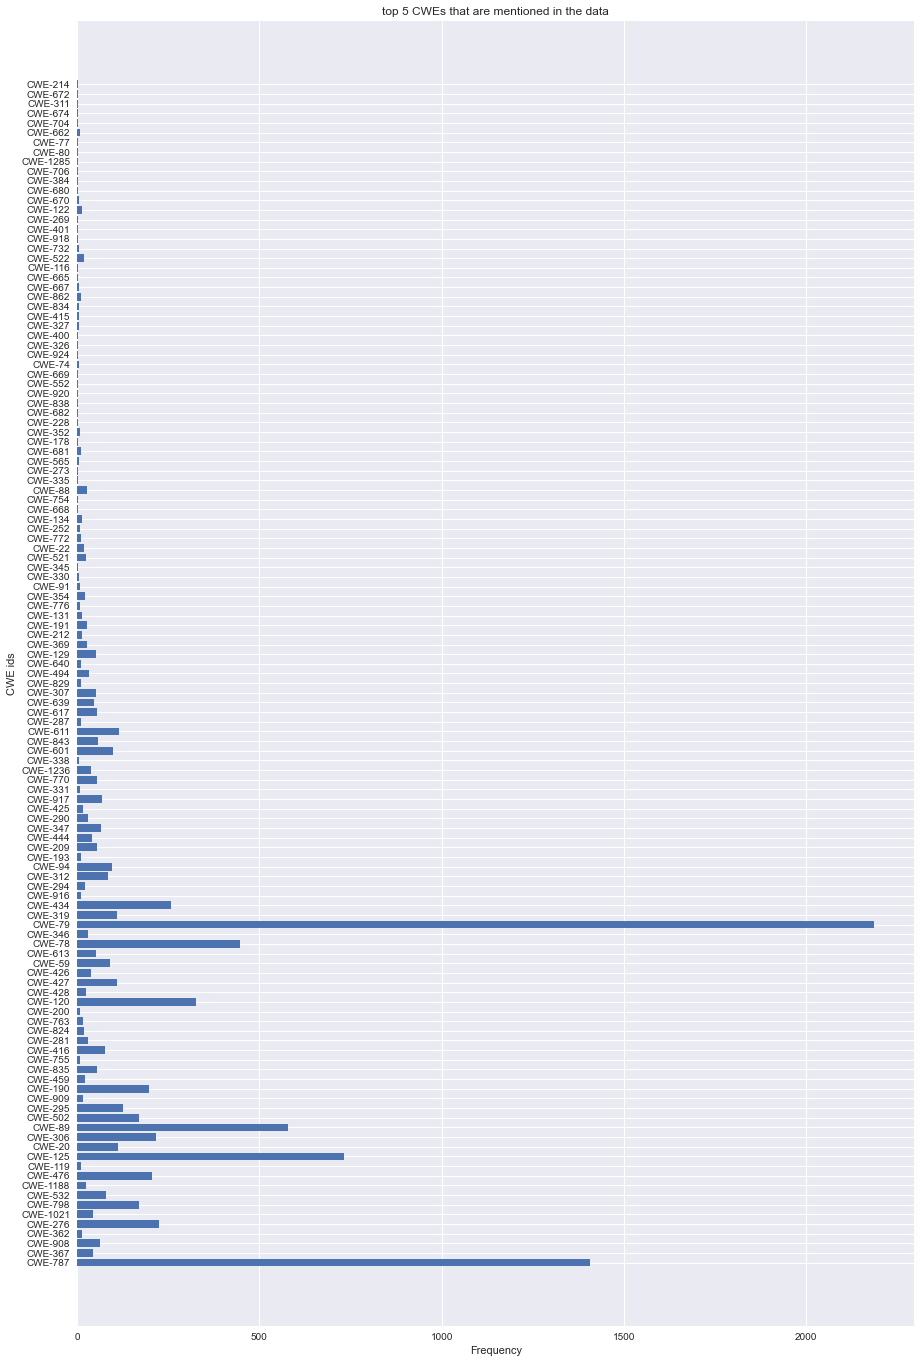

In [8]:
# YOUR CODE HERE
# draw canvas 
fig = plt.figure(figsize=(15,24))
ax = ax = plt.axes()

# using dictionary to find the number of cwe used, key=cwe's name, value=frequency of cwe's name appear
helpdict = dict()
# Split the columns
helpset = dataset['cwe_ids'].str.split(',', expand=True)
# Count how many times for each CWEs appear and put it in dictionary
for i in np.arange(4):
    for j in np.arange(len(helpset)):
        if helpset.iloc[j,i] != None:
            if helpset.iloc[j,i] in helpdict.keys():
                helpdict[helpset.iloc[j,i]] += 1
            else:
                helpdict[helpset.iloc[j,i]] = 1

# draw the bar plot
plt.barh(list(helpdict.keys()), list(helpdict.values()))
ax.set_ylabel("CWE ids")
ax.set_xlabel("Frequency")
ax.set_title("top 5 CWEs that are mentioned in the data")
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

#### (Q3.c)
Google products are commonly used.  Your team wants to know how cyber-threats are affecting google users.  Find all the CVEs associated with the Vendor google and present the distribution of CVSS Base Scores for google in a suitable manner.  Please also explain your steps.
<span style= 'float: right;'><b>[5 marks]</b></span>

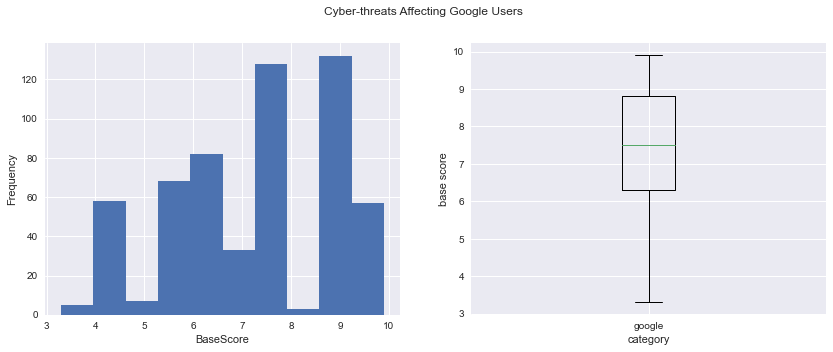

In [9]:
# YOUR CODE HERE
# draw canvas
fig = plt.figure(figsize=(14,5))

# draw histogram
ax1 = fig.add_subplot(121)
plt.hist(df.loc[df.vendor == "google", "v3_baseScore"], bins = 10)
ax1.set_xlabel("BaseScore")
ax1.set_ylabel("Frequency")

# draw box plot
ax2 = fig.add_subplot(122)
plt.boxplot([df.loc[(df.vendor == "google"), "v3_baseScore"]])
plt.xticks([1], ["google"])
ax2.set_xlabel("category")
ax2.set_ylabel("base score")

plt.suptitle("Cyber-threats Affecting Google Users")
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

#### (Q3.d)
Find the top 5 vendors that are most affected (i.e. that has most number of rows in the configurations table) and present the distribution of CVSS Base scores for these top 5 vendors using a suitable visualization.  Please also explain your steps.
<span style= 'float: right;'><b>[10 marks]</b></span>

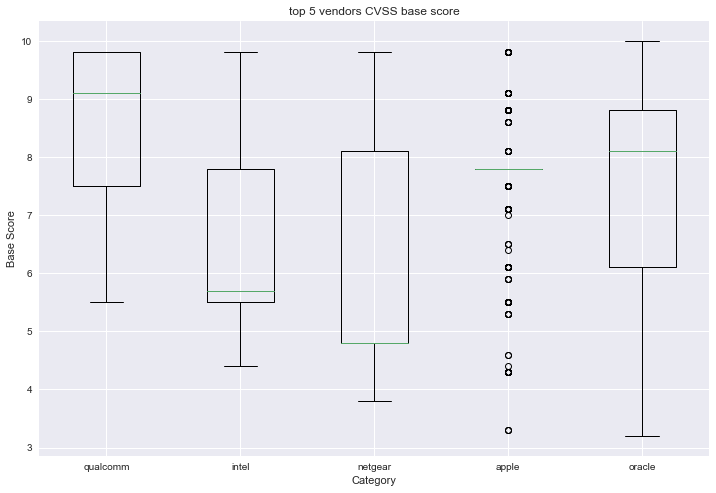

In [10]:
# YOUR CODE HERE
# find how many times does each vendors appear by using the dictionary, key=vendor's name, value = frequency
helpdic = dict()
for i in np.arange(len(df)):
    if df.iloc[i,22] in helpdic.keys():
        helpdic[df.iloc[i,22]] += 1
    else:
        helpdic[df.iloc[i,22]] = 1

# find top 5 vendors used
find_keys = sorted(helpdic, key=helpdic.get, reverse=True)[:5]

# draw the canvas
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

# draw each vendor's boxplot
data1 = df.loc[(df.vendor == find_keys[0]), "v3_baseScore"]
data2 = df.loc[(df.vendor == find_keys[1]), "v3_baseScore"]
data3 = df.loc[(df.vendor == find_keys[2]), "v3_baseScore"]
data4 = df.loc[(df.vendor == find_keys[3]), "v3_baseScore"]
data5 = df.loc[(df.vendor == find_keys[4]), "v3_baseScore"]

plt.boxplot([data1, data2, data3, data4, data5], labels=find_keys)

ax.set_xlabel("Category")
ax.set_ylabel("Base Score")
ax.set_title("top 5 vendors CVSS base score")

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Q4: Identifying Data Analysis Problems
### CVEs and real world issues

We mentioned that dataset is from 2020 and we have only given you the records that relate to the Software Development viewpoint. Do you remember any major software vulnerabilities that came to light in 2020? [This article](https://securityintelligence.com/posts/top-10-cybersecurity-vulnerabilities-2020/) claims that the top 2 vulnerabilities that were found in 2020 are;
- CVE-2020-8515: Draytek Vigor Command Injection
- CVE-2020-5722: HTTP: Grandstream UCM6200 SQL Injection

However, there may be various viewpoints. For e.g.: [this article](https://blog.detectify.com/2020/12/30/top-10-critical-cves-added-in-2020/) mentions another 10 CVE's. 

Your task is as follows:
#### (Q4.a)
- Find and present the vulnerabilities that are mentioned in the above two articles in the given dataset in a tabular format. You may not find all the 12 CVE's. What are possible reasons for this? (5 marks)
- Examine the properties of the CVEs that you found above. (At a minimum you should consider the data available in the './data/cvss_dataset.csv' file). Present a justification as to why some of the given CVEs may have been considered a _"large"_ bug? This should include references to the amount of damage a vulnerability caused, or could have potentially caused. (5 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional question for COMP6420 students: [worth extra 10 marks]**
#### (Q4.b)
- If you were given the task of identifying the top-10 most critical CVEs in the given data, how would you tackle the problem? Give a brief list of initial analysis you would perform. (7 marks)

- How would you go about implemention your proposed approach? (3 marks)

References are highly recommended for this question (both parts a and b) so that you can evidence your argument. **DO NOT** forget to list your references, including in your statement of originality document.  **Please note that failure to reference or improper referencing constitute a case for plagiarism which can have serious consequences for you.  So make sure you use references appropriately.  Please familiarise yourself with the university's [academic integrity rules here](https://www.anu.edu.au/students/academic-skills/academic-integrity) if you have not done so already**.

In [11]:
# YOUR CODE HERE
# find the rows appear in the data
frames = [dataset[dataset['cve_id'] == "CVE-2020-8515"], 
          dataset[dataset['cve_id'] == "CVE-2020-5722"], 
          dataset[dataset['cve_id'] == "CVE-2020-12720"],
          dataset[dataset['cve_id'] == "CVE-2020-5902"], 
          dataset[dataset['cve_id'] == "CVE-2020-17530"]]
out = pd.concat(frames)
out

# Not in: "CVE-2020-15506", "CVE-2020-14882", "CVE-2020-14750", "CVE-2020-2551", "CVE-2020-13379", 
# "CVE-2020-1147", "CVE-2020-8209"

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,cve_id,cwe_ids,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,...,v3_baseScore,v3_baseSeverity,attackVector_score,attackComplexity_score,privilegesRequired_score,userInteraction_score,confidentialityImpact_score,integrityImpact_score,availabilityImpact_score,ISS
8525,CVE-2020-8515,CWE-78,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,9.8,CRITICAL,0.85,0.77,0.85,0.85,0.56,0.56,0.56,0.914816
7331,CVE-2020-5722,CWE-89,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,9.8,CRITICAL,0.85,0.77,0.85,0.85,0.56,0.56,0.56,0.914816
1595,CVE-2020-12720,"CWE-89,CWE-306",NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,9.8,CRITICAL,0.85,0.77,0.85,0.85,0.56,0.56,0.56,0.914816
7419,CVE-2020-5902,"CWE-22,CWE-829",NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,9.8,CRITICAL,0.85,0.77,0.85,0.85,0.56,0.56,0.56,0.914816
3129,CVE-2020-17530,CWE-917,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,9.8,CRITICAL,0.85,0.77,0.85,0.85,0.56,0.56,0.56,0.914816


******
## Q5: Data Analysis
In this section, you will be provided a question or statement that you are required to prove/disprove. For each question, you are to provide a statement outlining your answer, using evidence from the dataset as your justification. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. That means you expected to justify your answer based on both statistical and visual evidence.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

Use the following as a guide to assess the statements given below:
- How would you assess the given statement? 
- What kinds of statistical tests are appropriate to validate the statement? Justify your selection.
- How would you present the information related to the statement in a graphical manner?
- What is your answer to the statement? Why do you say so?

**Hint:** You are not expected to build Machine Learning models to answer this question. 

#### (Q5.a)
#### Statement: "The sum of the two sub scores (i.e. the Exploitability sub-score and the Impact sub-score) is a 'good' predictor for the Base Score."

After implementing the **CVSSv3.1** Base Score calculator in Question 2, you may recall that the Base Score is derived from two sub scores (i.e. the Exploitability sub-score and the Impact sub-score). For simplicity, let us explore whether we can get a 'good' estimate for the Base Score just by simply adding up the Exploitability sub-score and the Impact sub-score. 

[5 marks for code implementation, 5 marks for written response]
<span style= 'float: right;'><b>[10 marks]</b></span>

In [12]:
# YOUR CODE HERE
t, p = stats.ttest_ind(dataset["v3_baseScore"], dataset["v3_impactScore"] + dataset["v3_exploitabilityScore"])
print("p-value: ", p)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

p-value:  1.5631126695360256e-11


#### (Q5.b):

#### Statement: "The entries which require both LOW/None privileges AND LOW attack complexity have a higer CVSS Base Score."

In this question we are looking at the relationship beetween some of the categorial data that is present in our dataset and our response variable. 

[5 marks for code implementation, 5 marks for written response]        
<span style= 'float: right;'><b>[10 marks]</b></span>

In [13]:
# YOUR CODE HERE
# find the base score for low or non privileges and low attack complexity
low_attack = dataset[((dataset.loc[:,"v3_privilegesRequired"] == "NONE") | 
                      (dataset.loc[:,"v3_privilegesRequired"] == "LOW")) & 
                     (dataset.loc[:, "v3_attackComplexity"] == "LOW")].loc[:,"v3_baseScore"]

# find the base score for low or non privileges and high attack complexity
high_attack = dataset[((dataset.loc[:,"v3_privilegesRequired"] == "NONE") | 
                      (dataset.loc[:,"v3_privilegesRequired"] == "LOW")) & 
                     (dataset.loc[:, "v3_attackComplexity"] == "HIGH")].loc[:,"v3_baseScore"]

t, p = stats.ttest_ind(low_attack, high_attack, alternative='greater')
print("p-value: ", p)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

p-value:  1.875095379767481e-14


******
## Q6: Classification

Now you are asked to build a classification model to predict the Threat level (Base Severity) of a vulnerability. 

Your task is as follows:
#### (Q6.a): Train a classification model to predict Threat level (Base Severity). You are able to choose any variables in the dataset, except of course the Base Scores, Sub Scores and Base Severity. (10 marks)
#### (Q6.b): Why did you implement this particular model? What are the advantages and limitations of this type of model? (2 marks)
#### (Q6.c): What are your considerations in implementing the training/testing split? Why did you make this choice? (2 marks)
#### (Q6.d): Briefly explain your training considerations (including iterations, hyper-parameters and variable selection). (2 marks)
#### (Q6.e):  How did you perform testing and validation? Which metrics were used in the validation? (2 marks)
#### (Q6.f): After running your experiment, provide a written answer highlighting your results and the outcome of your work. (2 marks)

<span style= 'float: right;'><b>[20 marks]</b></span>

In [16]:
# YOUR CODE HERE
# cope data from dataset to a new dataframe
df2 = dataset.copy()

# import dataset
X=df2[['attackVector_score','attackComplexity_score','privilegesRequired_score','userInteraction_score',
       'confidentialityImpact_score','integrityImpact_score','availabilityImpact_score']]
y=df2['v3_baseSeverity']

# use standard scaler to removes the mean and scales each feature/variable to unit variance.
ss = StandardScaler()
ss_model = ss.fit(X)
x_scaled = ss_model.transform(X)

# set a compare value
average = 0
# find the best k in arange 5 to 16 (not include 16)
for num in np.arange(5,16):
    # import knn
    knn = KNeighborsClassifier(n_neighbors=num)
    # use cross validate to splite the training set, the validation set and the testing set
    cv_results = cross_validate(knn, x_scaled, y, cv=6, return_train_score=True)
    # find average testing score
    average_num = np.mean(cv_results['test_score'])
    # find the best testing score
    if average_num > average:
        average = average_num
        # remember k
        k = num
        # remember training score
        train = np.mean(cv_results['train_score'])

# print output
print("Training Score:", train)
print("Testing score:", average_num)
print("K =", k)

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Training Score: 0.9860369163952226
Testing score: 0.9778501628664494
K = 7


******
## Q7: Apply your knowledge to the problem domain

The government is worried about security issues that target user involvement over the internet.  You have been asked to help identify relevant vulnerabilities that need to be prioritised for patching.  While the CVSS systems provide a good general system for determining the Threat Level (Severity) of a vulnerability, you are only concerned with weaknesses that can be exploited over a network, and require user interaction.

Your task is as follows:    
#### (Q7.a)
- Develop and present a basic heuristic to classify the Threat Level to identify which products need patching relevant to the above given context. A heuristic is a simple set of rules or a rule of thumb (e.g. 'If the fire alarm is activated, then leave the building' or 'If there are grey clouds, bring the washing in as it might rain' ). (2 marks)
<br>(Similar to the Q6 above, you are able to choose any variables in the dataset, except of course the Base Scores, Sub Scores and Base Severity)
- Run your heuristic over the dataset, and add the output to each row on the dataset, under a new column named `Threat Classification`.  (5 marks)
- Justify your use of variables and the reasoning behind your heuristic in the written section below and explain how this might be an effective solution to stopping attacks. (3 marks)

<span style= 'float: right;'><b>[10 marks]</b></span>

<br><br>
**Additional question for COMP6420 students: [worth extra 10 marks]**
#### (Q7.b)
 - Compare your heuristic result with the actual result (threat level) (5 marks)
 - Based on your result, how would you improve your heuristic? (no implementation is required) (5 marks)


In [17]:
# YOUR CODE HERE
# cope data from dataset to a new dataframe
df3 = dataset.copy()
#drop unneccesary column for this question
df3= df3.drop(['v3_exploitabilityScore','v3_impactScore','v3_scope','cwe_ids','ISS','v3_attackVector','v3_attackComplexity','v3_privilegesRequired','v3_confidentialityImpact','v3_userInteraction','v3_integrityImpact','v3_availabilityImpact', 'privilegesRequired_score'], axis=1)

# import data
X1=df3[["userInteraction_score","attackVector_score"]]
y1=df3['v3_baseSeverity']

# set train data and test data
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y1, test_size = 0.2)

# import knn
knn1 = KNeighborsClassifier()
# use knn to fit
knn_model = knn1.fit(train_x1, train_y1)

# find training score
train_score1 = knn_model.score(train_x1, train_y1)
# find testing score
test_score1 = knn_model.score(test_x1, test_y1)

# print output
print("Training Score:", train_score1)
print("Testing score: ", test_score1)

# find a way to define the Threat_Classification
df3["Threat_Classification_score"]=df3["userInteraction_score"]* df3["attackVector_score"]
df3.loc[(df3.Threat_Classification_score < 1.0) & ( df3.Threat_Classification_score > 0.7), 'Threat_Classification'] = "CRITICAL"
df3.loc[(df3.Threat_Classification_score < 0.7) & ( df3.Threat_Classification_score > 0.5), 'Threat_Classification'] = "HIGH"
df3.loc[(df3.Threat_Classification_score < 0.5) & ( df3.Threat_Classification_score > 0.3), 'Threat_Classification'] = "MEDIUM"
df3.loc[(df3.Threat_Classification_score < 0.3) & ( df3.Threat_Classification_score > 0.0), 'Threat_Classification'] = "LOW"

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

Training Score: 0.5973127035830619
Testing score:  0.5863192182410424
